ANNUAL CO2 | Source: NOAA ESRL | https://www.esrl.noaa.gov/
[########################################] | 100% Completed | 15.5s



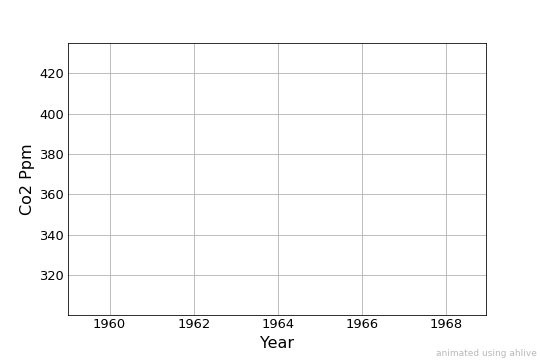

In [1]:
# https://ahlive.readthedocs.io/en/latest/introductions/overview.html

import ahlive as ah
df = ah.open_dataset(label='annual_co2')
ah_df = ah.DataFrame(df, xs='year', ys='co2_ppm')
ah_df.render()

In [2]:
df = ah.open_dataset(label="annual_co2")
ah_df = ah.DataFrame(
    df,
    xs="year",
    ys="co2_ppm",
    ylim1s='explore_0.05',
    ylabel="CO2 [ppm]",
    state_labels="year",
    inline_labels="co2_ppm",
    title="Annual Mean CO2 Concentration",
)
ah_df = ah_df.reference(x0s='x', label='')
ah_df = ah_df.remark(xs=1760, durations=1, remarks="Industrial Revolution")
ah_df = ah_df.config('inline', suffix=' ppm')
ah_df.render()

ANNUAL CO2 | Source: NOAA ESRL | https://www.esrl.noaa.gov/
[########################################] | 100% Completed | 20.5s


In [3]:
import ahlive as ah
s = [88, 888, 2888]
ah_arr1 = ah.Array(
    [0, 2, 30], [0, 0.5, 1], s=s, label='Bloo',
    interp='cubic', ease='in_out', revert='boomerang',
    frames=15, workers=2, pygifsicle=True)
ah_arr2 = ah.Array(
    [0, 0.5, 40], [1, 0.5, 2], s=s, label='OJ')
(ah_arr1 * ah_arr2).render()

[########################################] | 100% Completed | 13.5s


[########################################] | 100% Completed |  4.2s



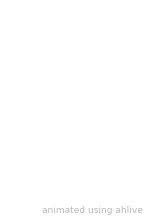

In [4]:

# define the data
xs = [0, 0, 0]
ys = [-2, 0, 2]
hello = ["Hello there!"] * len(xs)
enjoy = ["Enjoy your stay!"] * len(xs)

# serialize the data
ah_hello = ah.Array(
    xs,
    ys,
    s=0,
    inline_labels=hello,
    style="bare"
)
ah_enjoy = ah.Array(xs, ys, s=0, inline_labels=enjoy)

# cascade the data; i.e. run one after the other
ah_text = (ah_hello - ah_enjoy)

# customize configuration
ah_text = ah_text.config(
    figure={'figsize': (2, 3)},
    axes={'xlim': (-0.25, 0.25), 'ylim': (-1, 1)},
    inline={'ha': 'center'},
    spacing={'left': 0, 'right': 1, 'bottom': 0, 'right': 1},
)
ah_text.finalize()

# animate the data
ah_text.render()


In [5]:


import ahlive as ah
import pandas as pd
df = ah.tutorial.open_dataset('covid19_global_cases')

# convert cases to new cases per day
df_diff = df.pivot_table(
    'cases', columns='country_region', index='date'
).diff()
df_melt = df_diff.dropna().reset_index().melt(
    'date', value_name='new_cases'
).sort_values('date')

# start in March when testing became available
df_slice  = df_melt.loc[df_melt['date'] >= '2020-03-01']

# normalize by population
df_pop = ah.tutorial.open_dataset('covid19_population')[['combined_key', 'population']]
df_norm = df_slice .merge(df_pop, left_on='country_region', right_on='combined_key')
df_norm['new_cases'] = df_norm['new_cases'] / df_norm['population']
df_norm['new_cases'] *= 1e5

# join lats/lons
df_coords = df[['country_region', 'lat', 'long']].drop_duplicates(subset='country_region')
df_norm = df_norm.merge(df_coords, left_on='country_region', right_on='country_region')
df_norm = df_norm.loc[
    (df_norm['date'] >= '2021-01-01') &
    (df_norm['date'] < '2021-01-07')
]

display(df_norm)

COVID19 GLOBAL CASES | Source: JHU CSSE COVID-19 | https://github.com/CSSEGISandData/COVID-19
COVID19 POPULATION | Source: JHU CSSE COVID-19 | https://github.com/CSSEGISandData/COVID-19


date country_region  new_cases combined_key  population     lat  \
306   2021-01-01          Kenya   0.290118        Kenya  53771300.0 -0.0236   
307   2021-01-02          Kenya   0.119023        Kenya  53771300.0 -0.0236   
308   2021-01-03          Kenya   0.230606        Kenya  53771300.0 -0.0236   
309   2021-01-04          Kenya   0.197131        Kenya  53771300.0 -0.0236   
310   2021-01-05          Kenya   0.407280        Kenya  53771300.0 -0.0236   
...          ...            ...        ...          ...         ...     ...   
66584 2021-01-02     MS Zaandam        NaN   MS Zaandam         NaN  0.0000   
66585 2021-01-03     MS Zaandam        NaN   MS Zaandam         NaN  0.0000   
66586 2021-01-04     MS Zaandam        NaN   MS Zaandam         NaN  0.0000   
66587 2021-01-05     MS Zaandam        NaN   MS Zaandam         NaN  0.0000   
66588 2021-01-06     MS Zaandam        NaN   MS Zaandam         NaN  0.0000   

          long  
306    37.9062  
307    37.9062  
308    37.9062  
309    37.9062  
310    37.9062  
...        ...  
66584   0.0000  
66585   0.0000  
66586   0.0000  
66587   0.0000  
66588   0.0000  

[1152 rows x 7 columns]

In [6]:
ah_df = ah.DataFrame(
    df_norm, 'long', 'lat', label='country_region',
    chart='scatter', cs='new_cases', s='new_cases',
    state_labels='date', crs='platecarree',
    worldwide=True, legend=False,
    scheduler='processes', workers=4,
    animate='test'
)
ah_df.render()

ModuleNotFoundError: No module named 'cartopy'

In [7]:
import ahlive as ah
import pandas as pd

# laod dataset
df = ah.tutorial.open_dataset('covid19_global_cases')

# convert cases to new cases per day
df_diff = df.pivot_table(
    'cases', columns='country_region', index='date'
).diff()
df_melt = df_diff.dropna().reset_index().melt(
    'date', value_name='new_cases'
).sort_values('date')

# start in March when testing became available
df_slice  = df_melt.loc[df_melt['date'] >= '2020-03-01']

# normalize by population
df_pop = ah.tutorial.open_dataset('covid19_population')[['combined_key', 'population']]
df_norm = df_slice .merge(df_pop, left_on='country_region', right_on='combined_key')
df_norm['new_cases'] = df_norm['new_cases'] / df_norm['population']
df_norm['new_cases'] *= 1e5

# join lats/lons
df_coords = df[['country_region', 'lat', 'long']].drop_duplicates(subset='country_region')
df_norm = df_norm.merge(df_coords, left_on='country_region', right_on='country_region')

# remove negative cases
df_norm.loc[df_norm['new_cases'] < 0, 'new_cases'] = 0

# render
ah_df = ah.DataFrame(
    df_norm, 'long', 'lat', label='country_region',
    chart='scatter', cs='new_cases', s='new_cases',
    state_labels='date', crs='platecarree',
    worldwide=True, legend=False,
    figsize=(13, 5), vmin=0, vmax=350,
    clabel='New Cases / 100k',
    suptitle='COVID-19 Across the Globe',
    caption='Source: JHU CSSE COVID-19',
    note='*marker size depicts new cases',
    borders=True, ocean=True,
    frames=15, interp='cubic',
    projection='Orthographic',
    preset='rotate',
    scheduler='processes', workers=2
).config(
    'cticks', format='.0f', num_colors=10
).config(
    'projection', central_latitude=40
)

ah_df.render()

COVID19 GLOBAL CASES | Source: JHU CSSE COVID-19 | https://github.com/CSSEGISandData/COVID-19
COVID19 POPULATION | Source: JHU CSSE COVID-19 | https://github.com/CSSEGISandData/COVID-19


ModuleNotFoundError: No module named 'cartopy'